In [1]:
# pictures to demo combine

import collections
import editdistance
import libsbml
import numpy as np
import os
import pickle
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

all_biomd_fpaths = [val for val in os.listdir(BIOMODEL_DIR) if val[-4:]=='.xml']
print(len(all_biomd_fpaths))

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import constants as cn
from AMAS import tools

1000


In [17]:
# First, get statistics of models.. 
count = 0
for idx, one_fpath in enumerate(all_biomd_fpaths):
  if idx % 100 == 0:
    print("We are at", idx)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(os.path.join(BIOMODEL_DIR, one_fpath))
  model = document.getModel()
  spec_annotations = [val.getAnnotationString() for val \
                      in model.getListOfSpecies()]
  filt_spec = [val for val in spec_annotations if len(val)>0]
  reac_annotations = [val.getAnnotationString() for val \
                      in model.getListOfReactions()]
  filt_reac = [val for val in reac_annotations if len(val)>0]
  if len(filt_spec)>0 and len(filt_reac)>0:
    count += 1
print("Count: %d" % count)

We are at 0
We are at 100
We are at 200
We are at 300
We are at 400
We are at 500
We are at 600
We are at 700
We are at 800
We are at 900
Count: 752


In [24]:
# For second slide, get units. 
uns = model.getListOfUnitDefinitions()
for one_unit in uns:
  print(one_unit.name)

volume
substance


In [2]:
# For third, (demonstrating species by edit distance)
one_biomd = 'BIOMD0000000190.xml'
one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
reader = libsbml.SBMLReader()
document = reader.readSBML(one_biomd_fpath)
model = document.getModel()

In [3]:
from AMAS import recommender
recom = recommender.Recommender(one_biomd_fpath)

In [4]:
recom.species.names

{'SAM': 'S-adenosyl-L-methionine',
 'A': 'S-adenosylmethioninamine',
 'P': 'Putrescine',
 'S': 'Spermine',
 'D': 'Spermidine',
 'aS': 'N1-Acetylspermine',
 'aD': 'N1-Acetylspermidine',
 'Met': 'Methionine',
 'ORN': 'L-Ornithine',
 'AcCoA': 'Acetyl-CoA',
 'CoA': 'CoA'}

In [5]:
recom.getSpeciesAnnotation(pred_id='SAM')

Recommendation(id='SAM', credibility=1.0, candidates=[('CHEBI:15414', 1.0), ('CHEBI:59789', 1.0)], urls=['https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI%3A15414', 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI%3A59789'])

In [6]:
recom.getSpeciesAnnotation(pred_id='A')

Recommendation(id='A', credibility=0.93, candidates=[('CHEBI:15625', 1.0)], urls=['https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI%3A15625'])

In [7]:
recom.reactions.reaction_components

{'ODC': ['ORN', 'P'],
 'SAMdc': ['SAM', 'A'],
 'SSAT_for_S': ['S', 'aS', 'AcCoA', 'CoA'],
 'SSAT_for_D': ['D', 'CoA', 'aD', 'AcCoA'],
 'PAO_for_aD': ['aD', 'P'],
 'PAO_for_aS': ['D', 'aS'],
 'SpdS': ['D', 'A', 'P'],
 'SpmS': ['S', 'D', 'A'],
 'MAT': ['SAM', 'Met'],
 'VCoA': ['CoA', 'AcCoA'],
 'VacCoA': ['CoA', 'AcCoA'],
 'P_efflux': ['P'],
 'aD_efflux': ['aD']}

In [8]:
recom.species.exist_annotation

{}

In [9]:
recom.reactions.exist_annotation

{'ODC': ['RHEA:22967'],
 'SAMdc': ['RHEA:15984'],
 'SSAT_for_S': ['RHEA:11119'],
 'SSAT_for_D': ['RHEA:11119'],
 'PAO_for_aD': ['RHEA:25803'],
 'PAO_for_aS': ['RHEA:25803'],
 'SpdS': ['RHEA:12724'],
 'SpmS': ['RHEA:19976'],
 'MAT': ['RHEA:21083']}

In [10]:
one_r = model.getReaction('SAMdc')
print([val.species for val in one_r.getListOfReactants()])
print([val.species for val in one_r.getListOfProducts()])

['SAM']
['A']


In [11]:
recom.getReactionAnnotation('SAMdc')

Recommendation(id='SAMdc', credibility=0.38, candidates=[('RHEA:15984', 0.5)], urls=['https://www.rhea-db.org/rhea/15984'])

In [89]:
# briefly check how many have SBO410 for 'default compartment'
# count = 0
# sbo410_count = 0
model_null = 0


bqbiol_is = 0
bqbiol_isver = 0
bqbiol_ispart = 0
bqbiol_haspart = 0
bqbiol_hasprop = 0
bqbiol_isdisc = 0

bqbiol_is_isver = 0

for idx, one_fpath in enumerate(all_biomd_fpaths):
  if idx % 100 == 0:
    print("We are at", idx)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(os.path.join(BIOMODEL_DIR, one_fpath))
  model = document.getModel()
#   comp = model.getCompartment(0)
#   if comp.getId()=='default_compartment':
#     count += 1
#   if comp.sbo_term == 410:
#     sbo410_count += 1
  if len(model.getAnnotationString())==0:
    model_null += 1
  if 'bqbiol:is>' in model.getAnnotationString():
    bqbiol_is += 1
  if 'bqbiol:isVersionOf>' in model.getAnnotationString():
    bqbiol_isver += 1
  if 'bqbiol:isPartOf>' in model.getAnnotationString():
    bqbiol_ispart += 1
  if 'bqbiol:hasPart>' in model.getAnnotationString():
    bqbiol_haspart += 1
  if 'bqbiol:hasProperty>' in model.getAnnotationString():
    bqbiol_hasprop += 1
  if 'bqbiol:isDescribedBy>' in model.getAnnotationString():
    bqbiol_isdisc += 1
  if 'bqbiol:is>' in model.getAnnotationString() or 'bqbiol:isVersionOf>' in model.getAnnotationString():
    bqbiol_is_isver += 1    
    
print("is", bqbiol_is)
print("isVersionOf", bqbiol_isver)
print("isPart", bqbiol_ispart)
print("hasPart", bqbiol_haspart)
print("hasProperty", bqbiol_hasprop)
print("isDescribedBy", bqbiol_isdisc)


print("is or isVersionOf", bqbiol_is_isver)

We are at 0
We are at 100
We are at 200
We are at 300
We are at 400
We are at 500
We are at 600
We are at 700
We are at 800
We are at 900
is 117
isVersionOf 611
isPart 93
hasPart 110
hasProperty 564
isDescribedBy 136
is or isVersionOf 684


In [12]:
def doesAnnotationExist(inp_ele):
  """
  Check both annotationstring
  (bqbio:is or isVersionOf)
  and sbo_term.
  If either exists, return True
  if not, False. 
  
  Parameters
  ---------
  inp_ele: libsbml element
  
  Returns
  -------
  bool
  """
  annotation_str = inp_ele.getAnnotationString()
  sbo = inp_ele.sbo_term
  filt_annot = tools.getOntologyFromString(annotation_str)
  if sbo!= -1:
    filt_sbo = sbo
  else:
    filt_sbo = None
  res_combination = (filt_annot, filt_sbo)
#   return res_combination
  if any(res_combination):
    return True
  else:
    return False
#   return (filt_annot, filt_sbo)

def getAnnotationsProp(inp_ele_list):
  """
  Run doesAnnotationsExit for 
  a list of elements,
  and return a proportion of
  annotated elements if there is any;
  Otherwise, return None.
  
  Parameters
  ----------
  inp_ele_list: list-libsml elements
  
  Returns
  -------
  float/None
  """
  res_list = [doesAnnotationExist(val) for val in inp_ele_list]
  if np.sum(res_list)>0:
    return np.sum(res_list)/len(res_list)
  else:
    return None

In [13]:
res = [doesAnnotationExist(val) for val in model.getListOfReactions()]
print(res)

[True, True, True, True, True, True, True, True, True, True, True, True, False]


In [14]:
ele_keys = ['species', 'reaction', 'rule', 'compartment',
            'unitdef', 'initassign', 'event']
res_dict = dict.fromkeys(ele_keys, [])
for idx, one_fpath in enumerate(all_biomd_fpaths):
  if idx % 100 == 0:
    print("We are at", idx)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(os.path.join(BIOMODEL_DIR, one_fpath))
  model = document.getModel()
  elements_list = [model.getListOfSpecies(), model.getListOfReactions(),
                  model.getListOfRules(), model.getListOfCompartments(),
                  model.getListOfUnitDefinitions(), model.getListOfInitialAssignments(),
                  model.getListOfEvents()]
  for key_idx, ele in enumerate(elements_list):
    res = getAnnotationsProp(ele)
    if res:
      res_dict[ele_keys[key_idx]] = res_dict[ele_keys[key_idx]] + [res]

#   spec_res = getAnnotationsProp()
#   if spec_res:
#     prop_spec_annotated.append(spec_res)
#   reac_res = getAnnotationsProp()
#   if reac_res:
#     prop_reac_annotated.append(reac_res)
#   rule_res = getAnnotationsProp()
#   if rule_res:
#     prop_reac_annotated.append(reac_res)
#   reac_res = getAnnotationsProp()
#   if reac_res:
#     prop_reac_annotated.append(reac_res)
#   reac_res = getAnnotationsProp(model.getListOfReactions())
#   if reac_res:
#     prop_reac_annotated.append(reac_res)
#   break


#   spec_res = [doesAnnotationExist(val) for val in model.getListOfSpecies()]
#   reac_res = [doesAnnotationExist(val) for val in model.getListOfReactions()]
#   if np.sum(spec_res)>0:
#     prop_spec_annotated.append(np.sum(spec_res)/len(spec_res))
#   if np.sum(reac_res)>0:
#     prop_reac_annotated.append(np.sum(reac_res)/len(reac_res))

We are at 0
We are at 100
We are at 200
We are at 300
We are at 400
We are at 500
We are at 600
We are at 700
We are at 800
We are at 900


In [15]:
res_dict.keys()

dict_keys(['species', 'reaction', 'rule', 'compartment', 'unitdef', 'initassign', 'event'])

In [16]:
res_dict['rule']

[0.16666666666666666,
 0.16666666666666666,
 0.38461538461538464,
 0.35714285714285715,
 1.0,
 0.5,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2]

In [17]:
res_dict['unitdef']

[]

In [18]:
res_dict['initassign']

[1.0]

In [19]:
res_dict['event']

[0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.1111111111111111,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5]

In [20]:
one_r = model.getReaction(0)

In [44]:
spec_ont

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [ ]:
def getExistingAnnotation(inp_ele)

In [45]:
# prop_spec_annotated = []
# prop_reac_annotated = []
# prop_specreac1_annotated = []
# prop_specreac2_annotated = []
# for idx, one_fpath in enumerate(all_biomd_fpaths):
#   if idx % 100 == 0:
#     print("We are at", idx)
#   reader = libsbml.SBMLReader()
#   document = reader.readSBML(os.path.join(BIOMODEL_DIR, one_fpath))
#   model = document.getModel()
#   # Get SBO pair as well .. write a method to determine whether given element is annotated (by both string/sbo_term)
#   spec_annot = [val.getAnnotationString() for val \
#                 in model.getListOfSpecies()]
#   spec_ont = [tools.getOntologyFromString(val) for val in spec_annot]
#   if any(spec_ont):
#     filt_spec = [val for val in spec_ont if len(val)>0]
#     prop_spec_annotated.append(len(filt_spec)/len(spec_ont))
#   #
#   reac_annot = [val.getAnnotationString() for val \
#                 in model.getListOfReactions()]
#   reac_ont = [tools.getOntologyFromString(val) for val in reac_annot]
#   if any(reac_ont):
#     filt_reac = [val for val in reac_ont if len(val)>0]
#     prop_reac_annotated.append(len(filt_reac)/len(reac_ont))
    
#   # check the intersection of it. 
#   if any(spec_ont) and any(reac_ont):
#     filt_spec = [val for val in spec_ont if len(val)>0]
#     filt_reac = [val for val in reac_ont if len(val)>0]
#     prop_specreac1_annotated.append( (len(filt_spec)+len(filt_reac)) / (len(spec_ont) + len(reac_ont)) )
#     prop_specreac2_annotated.append( (len(filt_spec)/len(spec_ont) + len(filt_reac)/len(reac_ont))/2 )

In [56]:
prop_spec_annotated = []
prop_reac_annotated = []
prop_specreac1_annotated = []

for idx, one_fpath in enumerate(all_biomd_fpaths):
  if idx % 100 == 0:
    print("We are at", idx)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(os.path.join(BIOMODEL_DIR, one_fpath))
  model = document.getModel()
  spec_stat = [doesAnnotationExist(val) for val in model.getListOfSpecies()]    
  reac_stat = [doesAnnotationExist(val) for val in model.getListOfReactions()]
  if any(spec_stat):
    prop_spec_annotated.append(np.mean(spec_stat))
  if any(reac_stat):
    prop_reac_annotated.append(np.mean(reac_stat))
  if any(spec_stat) and any(reac_stat):
    prop_specreac1_annotated.append((np.mean(spec_stat) + np.mean(reac_stat))/2)

We are at 0
We are at 100
We are at 200
We are at 300
We are at 400
We are at 500
We are at 600
We are at 700
We are at 800
We are at 900


452
total 898


(array([  8.,   6.,   8.,   5.,   8.,  11.,   3.,   9.,  19.,  16.,  17.,
         17.,  31.,  12.,  22.,  28.,  34.,  19.,  29.,  40.,  31.,  23.,
         19.,  28., 455.]),
 array([0.01834862, 0.05761468, 0.09688073, 0.13614679, 0.17541284,
        0.2146789 , 0.25394495, 0.29321101, 0.33247706, 0.37174312,
        0.41100917, 0.45027523, 0.48954128, 0.52880734, 0.56807339,
        0.60733945, 0.6466055 , 0.68587156, 0.72513761, 0.76440367,
        0.80366972, 0.84293578, 0.88220183, 0.92146789, 0.96073394,
        1.        ]),
 <BarContainer object of 25 artists>)

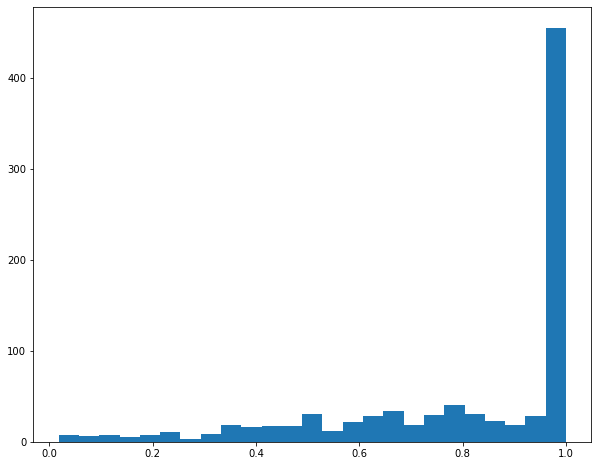

In [57]:
print(len([val for val in prop_spec_annotated if val<1.0]))
print("total", len(prop_spec_annotated))
plt.figure(figsize=(10, 8))
plt.hist(prop_spec_annotated, bins=25)

204
total 616


(array([  4.,   2.,   3.,   4.,   2.,   3.,   2.,   1.,   3.,   3.,   3.,
          3.,   7.,   5.,   8.,   7.,   6.,  10.,  12.,  10.,   9.,  15.,
         24.,  28., 442.]),
 array([0.02083333, 0.06      , 0.09916667, 0.13833333, 0.1775    ,
        0.21666667, 0.25583333, 0.295     , 0.33416667, 0.37333333,
        0.4125    , 0.45166667, 0.49083333, 0.53      , 0.56916667,
        0.60833333, 0.6475    , 0.68666667, 0.72583333, 0.765     ,
        0.80416667, 0.84333333, 0.8825    , 0.92166667, 0.96083333,
        1.        ]),
 <BarContainer object of 25 artists>)

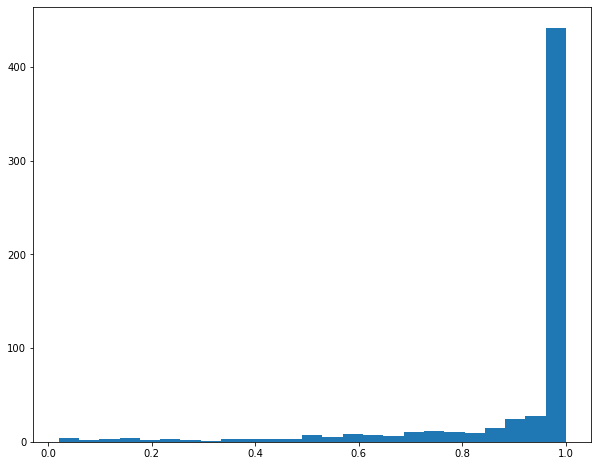

In [58]:
print(len([val for val in prop_reac_annotated if val<1.0]))
print("total", len(prop_reac_annotated))
plt.figure(figsize=(10, 8))
plt.hist(prop_reac_annotated, bins=25)

partially annotated: 357
fully annotated: 247
total 604


(array([  1.,   1.,   0.,   2.,   0.,   3.,   0.,   4.,   3.,   4.,   6.,
          5.,   8.,  13.,  11.,  17.,  25.,  20.,  29.,  33.,  28.,  44.,
         43.,  39., 265.]),
 array([0.089  , 0.12544, 0.16188, 0.19832, 0.23476, 0.2712 , 0.30764,
        0.34408, 0.38052, 0.41696, 0.4534 , 0.48984, 0.52628, 0.56272,
        0.59916, 0.6356 , 0.67204, 0.70848, 0.74492, 0.78136, 0.8178 ,
        0.85424, 0.89068, 0.92712, 0.96356, 1.     ]),
 <BarContainer object of 25 artists>)

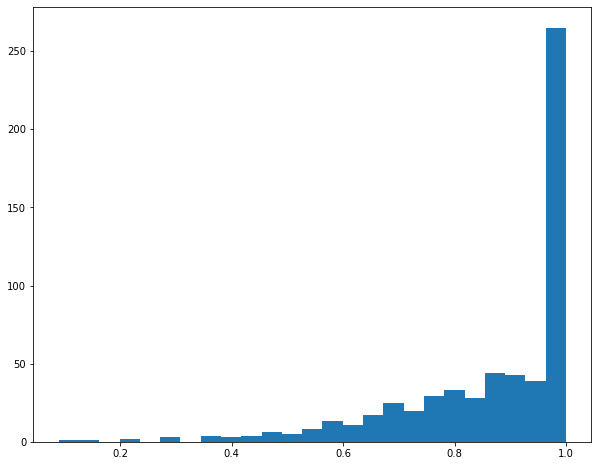

In [60]:
print("partially annotated:", len([val for val in prop_specreac1_annotated if val<1.0]))
print("fully annotated:", len([val for val in prop_specreac1_annotated if val>=1.0]))
print("total", len(prop_specreac1_annotated))
plt.figure(figsize=(10, 8))
plt.hist(prop_specreac1_annotated, bins=25)

In [26]:
# Plot for biomodels evaluation
dat_dir = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/csv_for_accuracy'
spec_df = pd.read_csv(os.path.join(dat_dir, 'individual_species_accuracy.csv'),
                         index_col=0)
reac_df = pd.read_csv(os.path.join(dat_dir, 'individual_reaction_accuracy.csv'),
                         index_col=0)

In [27]:
np.mean(spec_df['accuracy'])

0.7427580579355365

In [28]:
np.median(reac_df['accuracy'])

1.0

In [62]:
print(spec_df.shape)
spec_df.head()

(4902, 7)


,model,species_id,name_used,name_length,num_candidates,match_score,accuracy
0,BIOMD0000000634.xml,ATP,ATP,3,2,1.000000,1
1,BIOMD0000000634.xml,ADP,ADP,3,3,1.000000,1
2,BIOMD0000000634.xml,AMP,AMP,3,3,1.000000,1
3,BIOMD0000000152.xml,Ca,Ca,2,1,1.000000,1
4,BIOMD0000000152.xml,PP2BinactiveCa2,PP2BinactiveCa2,15,7,0.466667,0


In [30]:
# get model-level values for histogram.
spec_models = np.unique(spec_df['model'])
spec_res = []
print("Species models total:", len(spec_models))
for one_model in spec_models:
  one_set = spec_df[spec_df['model']==one_model]
  one_set_accuracy = np.mean(one_set['accuracy'])
  spec_res.append(one_set_accuracy)

Species models total: 306


(array([58.,  0.,  2.,  1.,  3.,  5.,  6.,  4.,  8.,  3., 11.,  6., 16.,
         6.,  5., 12., 14.,  6., 10.,  7., 13.,  6.,  3., 13., 88.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

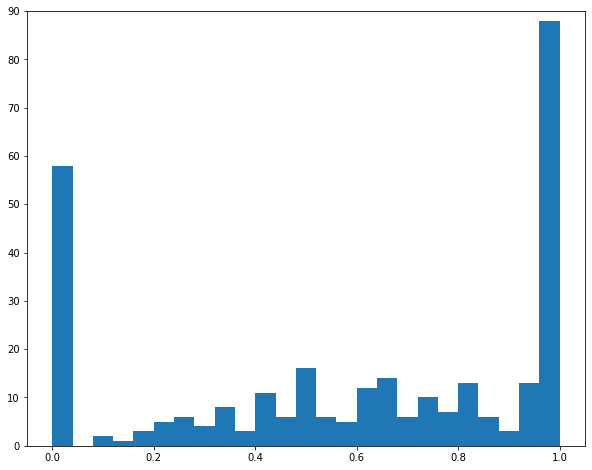

In [31]:
plt.figure(figsize=(10, 8))
plt.ylim(ymin=0.0, ymax = 90)
plt.hist(spec_res, bins=25)

In [63]:
print(reac_df.shape)

(2188, 10)


Reaction models total: 131


(array([61.,  0.,  1.,  1.,  3.,  1.,  3.,  3.,  2.,  3.,  4.,  1.,  6.,
         4.,  0.,  1.,  6.,  2.,  7.,  2.,  2.,  2.,  1.,  1., 14.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

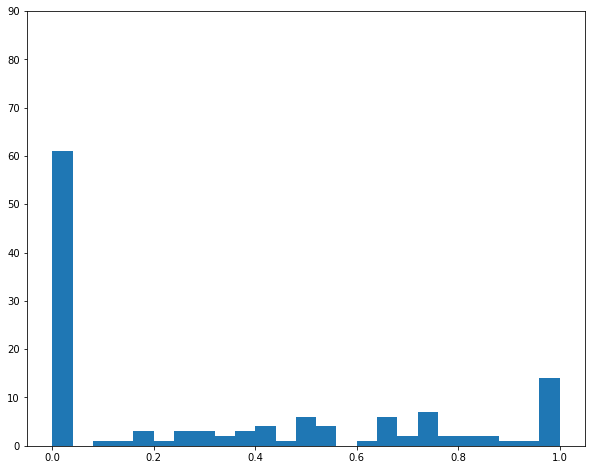

In [32]:
reac_models = np.unique(reac_df['model'])
reac_res = []
print("Reaction models total:", len(reac_models))
for one_model in reac_models:
  one_set = reac_df[reac_df['model']==one_model]
  one_set_accuracy = np.mean(one_set['accuracy'])
  reac_res.append(one_set_accuracy)

plt.figure(figsize=(10, 8))
plt.ylim(ymin=0.0, ymax = 90)
plt.hist(reac_res, bins=25)

In [33]:
# finally, find situation when reaction was incorrectly annotated;
reader = libsbml.SBMLReader()
document = reader.readSBML(os.path.join(BIOMODEL_DIR, 'BIOMD0000000248.xml'))
model = document.getModel()
one_r_name = 'CreatineKinase'
one_r = model.getReaction(one_r_name)

In [34]:
print([val.species for val in one_r.getListOfReactants()])
print([val.stoichiometry for val in one_r.getListOfReactants()])
print([val.species for val in one_r.getListOfProducts()])
print([val.stoichiometry for val in one_r.getListOfProducts()])

['ADP', 'PCr']
[1.0, 1.0]
['ATP', 'Cr']
[1.0, 1.0]


In [35]:
editdistance.eval('AKKP', 'ATP')

2

Species models total: 306


(array([ 2.,  4.,  1.,  9.,  6.,  8.,  8., 18., 23., 15., 19., 13., 32.,
        27., 19., 17., 11., 11., 17.,  4.,  3.,  1.,  0.,  1., 37.]),
 array([0.02631579, 0.06526316, 0.10421053, 0.14315789, 0.18210526,
        0.22105263, 0.26      , 0.29894737, 0.33789474, 0.37684211,
        0.41578947, 0.45473684, 0.49368421, 0.53263158, 0.57157895,
        0.61052632, 0.64947368, 0.68842105, 0.72736842, 0.76631579,
        0.80526316, 0.84421053, 0.88315789, 0.92210526, 0.96105263,
        1.        ]),
 <BarContainer object of 25 artists>)

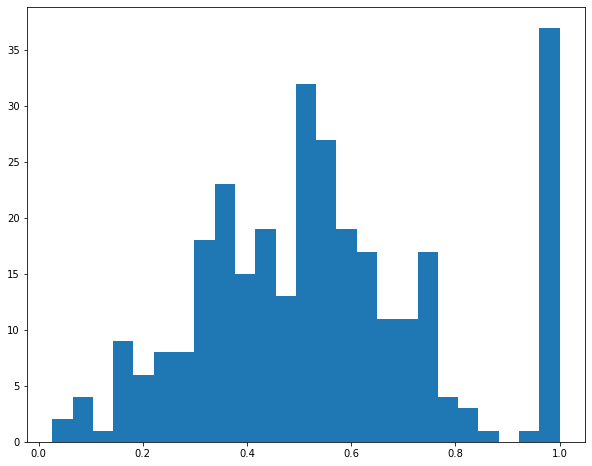

In [36]:
# Based on feedback, we'll plot precision

spec_models = np.unique(spec_df['model'])
spec_prec = []
for one_model in spec_models:
  one_set = spec_df[spec_df['model']==one_model]
  one_set_precision = np.mean([1/val for val in one_set['num_candidates']])
  spec_prec.append(one_set_precision)

print("Species models total:", len(spec_prec))
plt.figure(figsize=(10, 8))
# plt.xlim(xmin=0.0, xmax = 1.0)
plt.hist(spec_prec, bins=25)

Reaction models total: 131


(array([18.,  9.,  6., 14.,  8.,  4., 11.,  5., 13.,  8.,  4.,  5.,  2.,
         2.,  4.,  1.,  3.,  3.,  3.,  3.,  2.,  0.,  1.,  1.,  1.]),
 array([7.32547066e-05, 3.00703245e-02, 6.00673943e-02, 9.00644641e-02,
        1.20061534e-01, 1.50058604e-01, 1.80055674e-01, 2.10052743e-01,
        2.40049813e-01, 2.70046883e-01, 3.00043953e-01, 3.30041023e-01,
        3.60038092e-01, 3.90035162e-01, 4.20032232e-01, 4.50029302e-01,
        4.80026372e-01, 5.10023442e-01, 5.40020511e-01, 5.70017581e-01,
        6.00014651e-01, 6.30011721e-01, 6.60008791e-01, 6.90005860e-01,
        7.20002930e-01, 7.50000000e-01]),
 <BarContainer object of 25 artists>)

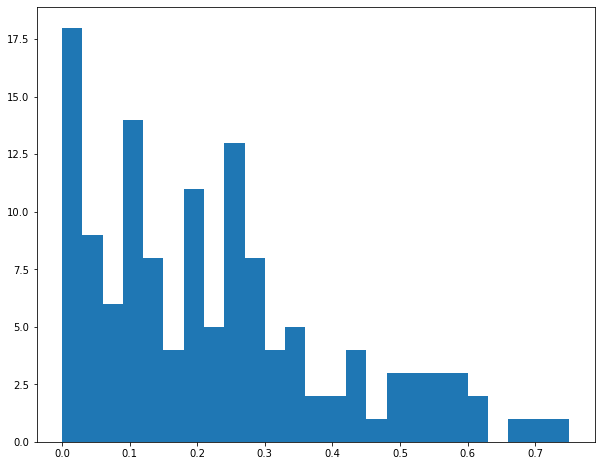

In [37]:
# Based on feedback, we'll plot precision

reac_models = np.unique(reac_df['model'])
reac_prec = []

for one_model in reac_models:
  one_set = reac_df[reac_df['model']==one_model]
  one_set_precision = np.mean([1/val for val in one_set['num_candidates']])
  reac_prec.append(one_set_precision)

print("Reaction models total:", len(reac_prec))
plt.figure(figsize=(10, 8))
# plt.xlim(xmin=0.0, xmax = 1.0)
plt.hist(reac_prec, bins=25)

In [61]:
sa.ref_shortened_chebi_to_formula['CHEBI:29192']

'O2'